<a href="https://colab.research.google.com/github/papecode/data_collection_with_tabula/blob/main/Collecte_de_tables_donn%C3%A9es_en_utilisant_pandas_read_html_et_tabula_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'bisque'> Web Scraping
![scraping](https://www.edureka.co/blog/wp-content/uploads/2018/11/Untitled-1.jpg)
>#### Definition
* Le Web Scraping est une technique permettant d'extraire des informations sous diverses formes à partir de sites web.


![](https://camo.githubusercontent.com/1794c189639b0eadecdfaa98a30c44e6db2ce895/68747470733a2f2f696d6772656469726563742e6d696c616e756e63696f732e636f6d2f66672f323430352f39352f3234303539353633385f322e6a70673f56657273696f6e49643d577548666942456a37557a3038734d4532513261424e4c5a4744557a63723732)


#### Web Scraping avec coding

<ul>
<li>Pandas.read_html</li>
<li>BeautifulSoup</li>
<li>Selenium</li>
</ul>

#### Web Scraping sans coding

<ul>
<li>Web Scraper</li>
<li>Browserflow</li>
</ul>


**Pandas read_html permet de scraper des données structurées sous forme de tableau en lisant le code html de la page web**.


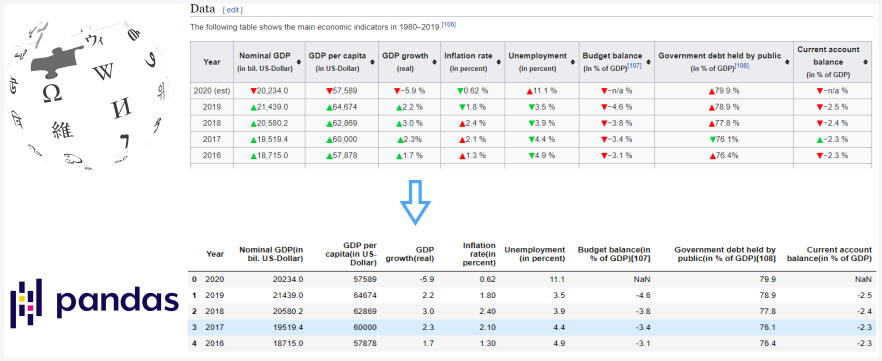

### <font color = 'gold'> Collecter les données sur une page

In [ ]:
# url
url = 'https://www.basketball-reference.com/teams/'

In [ ]:
# Importer pandas
import pandas as pd

In [ ]:
# Collecter toutes les tables qui existent sur la page web en utilisant pd.read_html
data = pd.read_html(url,header=0) # data = [table1 , table2]

In [ ]:
# Type des données
type(data)

list

In [ ]:
# vérifier la longueur de data
len(data)

2

In [ ]:
# Premier dataframe
df1 = data[0]
df1.head()

Franchise   Lg     From       To  Yrs     G     W     L   W/L%  \
0          Atlanta Hawks  NBA  1949-50  2024-25   76  6019  2967  3052  0.493   
1          Atlanta Hawks  NBA  1968-69  2024-25   57  4601  2269  2332  0.493   
2        St. Louis Hawks  NBA  1955-56  1967-68   13  1005   553   452  0.550   
3        Milwaukee Hawks  NBA  1951-52  1954-55    4   281    91   190  0.324   
4  Tri-Cities Blackhawks  NBA  1949-50  1950-51    2   132    54    78  0.409   

   Plyfs  Div  Conf  Champ  
0     50   12     0      1  
1     37    6     0      0  
2     12    6     0      1  
3      0    0     0      0  
4      1    0     0      0

In [ ]:
# Deuxième dataframe
df2 = data[1]
df2.head()

Franchise       Lg     From       To  Yrs    G    W    L   W/L%  \
0   Anderson Packers      NBA  1949-50  1949-50    1   64   37   27  0.578   
1  Baltimore Bullets  NBA/BAA  1947-48  1954-55    8  450  158  292  0.351   
2      Chicago Stags  NBA/BAA  1946-47  1949-50    4  237  145   92  0.612   
3   Cleveland Rebels      BAA  1946-47  1946-47    1   60   30   30  0.500   
4     Denver Nuggets      NBA  1949-50  1949-50    1   62   11   51  0.177   

   Plyfs  Div  Conf  Champ  
0      1  0.0     0      0  
1      3  0.0     0      1  
2      4  1.0     0      0  
3      1  0.0     0      0  
4      0  0.0     0      0

In [ ]:
# dimension de df1 et df2
print(df1.shape)
print(df2.shape)

(85, 13)
(44, 13)


In [ ]:
# Vérifier l'existence de doublons de df1 et df2
print(df1.duplicated().sum(), "----", df2.duplicated().sum())

0 ---- 0


In [ ]:
# Vérifier le type des variables de df1 et df2
print(df1.dtypes, '\n\n', df2.dtypes)

Franchise     object
Lg            object
From          object
To            object
Yrs            int64
G              int64
W              int64
L              int64
W/L%         float64
Plyfs          int64
Div            int64
Conf           int64
Champ          int64
dtype: object 

 Franchise     object
Lg            object
From          object
To            object
Yrs            int64
G              int64
W              int64
L              int64
W/L%         float64
Plyfs          int64
Div          float64
Conf           int64
Champ          int64
dtype: object


In [ ]:
# Vérifier l'existence de valeurs manquantes de df1 et df2
# print(df1.isna().sum(), "\n\n", df2.isna().sum())
print(df1.isnull().any().sum(), "--", df2.isnull().any().sum())

# Columns = []
# for col,value in df2.isnull().sum():
#   if value !=0 :
#     Columns.append(col)

0 -- 1


In [ ]:
# Remplacer les valeurs manquantes par la moyenne
df2.fillna({"Div": df2.Div.mean()}, inplace = True)
print(df2.Div.isnull().sum())

0


In [ ]:
# Concater df1 et df2
df = pd.concat([df1, df2], axis = 0 ).reset_index(drop = True)
df.tail()

Franchise       Lg     From       To  Yrs    G    W    L  \
124     Virginia Squires      ABA  1970-71  1975-76    6  503  200  303   
125  Washington Capitols      ABA  1969-70  1969-70    1   84   44   40   
126         Oakland Oaks      ABA  1967-68  1968-69    2  156   82   74   
127  Washington Capitols  NBA/BAA  1946-47  1950-51    5  271  157  114   
128       Waterloo Hawks      NBA  1949-50  1949-50    1   62   19   43   

      W/L%  Plyfs  Div  Conf  Champ  
124  0.398      4  1.0     0      0  
125  0.524      1  0.0     0      0  
126  0.526      1  1.0     0      1  
127  0.579      4  2.0     0      0  
128  0.306      0  0.0     0      0

### <font color = 'gold'> Collecter les données sur plusieurs pages

In [ ]:
# Sur cette page web, nous avons des données sur les joueurs de football américain.
url = 'https://www.nfl.com/stats/player-stats/category/passing/2010/post/all/passingyards/DESC'

In [ ]:
#Utilisez une boucle for pour collecter des données de 1970 à 2024.
df = pd.DataFrame()
# 1970-------table1970---------concat(df,df1970)
# 1971-------table1971---------concat(df,df1971)
# ----------------------------------------------
# 2024-------table2024----------concat(df, df2024)
for year in range(1970, 2025):
  url_page = f'https://www.nfl.com/stats/player-stats/category/passing/{year}/post/all/passingyards/DESC'
  # url = 'https://www.nfl.com/stats/player-stats/category/passing/{}/post/all/passingyards/DESC'.format(year)
  DF_page = pd.read_html(url_page)[0]
  DF_page['year'] = year # rajouter une variable year
  df = pd.concat([df, DF_page], axis = 0).reset_index(drop = True)

In [ ]:
# Afficher df
df.head()

Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT  Rate  1st  \
0      John Brodie      2941      7.8  378  223   59.0  24   10  93.8  106   
1   Fran Tarkenton      2777      7.1  389  219   56.3  19   12  82.2  101   
2         Jim Hart      2575      6.9  373  171   45.8  14   18  61.5   96   
3    Roman Gabriel      2552      6.3  407  211   51.8  16   12  72.2   86   
4  Daryle Lamonica      2516      7.1  356  179   50.3  22   15  76.5   83   

   1st%  20+  40+  Lng  Sck  SckY  year  
0  28.0    0    0   79    8    67  1970  
1  26.0    0    0   59   36   249  1970  
2  25.7    0    0   79   26   216  1970  
3  21.1    0    0   71   20   134  1970  
4  23.3    0    0   60   15   127  1970

In [ ]:
# Dimension de df
df.shape

(1375, 17)

In [ ]:
# Vérifier l'existence de doublons
print(df.duplicated().sum())

0


In [ ]:
# Vérifier l'existence de valeurs manquantes
print(df.isnull().any().sum())

0


In [ ]:
# Vérifier le type des variables
print(df.dtypes)

Player       object
Pass Yds      int64
Yds/Att     float64
Att           int64
Cmp           int64
Cmp %       float64
TD            int64
INT           int64
Rate        float64
1st           int64
1st%        float64
20+           int64
40+           int64
Lng           int64
Sck           int64
SckY          int64
year          int64
dtype: object


In [ ]:
# télécharger des données
df.to_csv('/content/drive/MyDrive/Data_collection/CD 1/CD 1/CD 1/nfl_players.csv', index = False)
df.to_excel('/content/drive/MyDrive/Data_collection/CD 1/CD 1/CD 1/nfl_players.xlsx', index = False)

### <font color = 'gold'> Collecter un tableau de données à partir d'un fichier pdf à l'aide de tabula

Tabular permet aux utilisateurs d'extraire des tableaux de données d'un fichier PDF et de les convertir directement en dataframe.

In [ ]:
# installer tabula
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 92.4 MB/s eta 0:00:00


In [ ]:
# importer tabula
import tabula as tb
# Extraire les tables du fichier sample1.pdf
tables= tb.read_pdf('/content/drive/MyDrive/Data_collection/CD 1/CD 1/CD 1/Copie de sample1.pdf', pages ="all" ) # [table1, table2]
# Afficher le nombre de tables
len(tables)

2

In [ ]:
# table 1
table1 = tables[0]
table1.head()

Date   Open   High     Low  Close / Last      Volume
0  01/04/2017  62.48  62.75  62.120         62.30  21,325,140
1  01/03/2017  62.79  62.84  62.125         62.58  20,655,190
2  12/30/2016  62.96  62.99  62.030         62.14  25,575,720
3  12/29/2016  62.86  63.20  62.730         62.90  10,248,460
4  12/28/2016  63.40  63.40  62.830         62.99  14,348,340

In [ ]:
# table 2
table2 = tables[1]
table2.head()

Date     Open     High       Low  Close / Last      Volume
0  01/04/2017  117.550  119.660  117.2900        118.69  19,594,560
1  01/03/2017  116.030  117.840  115.5100        116.86  20,635,600
2  12/30/2016  116.595  116.830  114.7739        115.05  18,668,290
3  12/29/2016  117.000  117.531  116.0600        116.35   9,925,082
4  12/28/2016  118.190  118.250  116.6500        116.92  11,985,740

In [ ]:
# concater les deux tables
table = pd.concat([table1, table2], axis = 0).reset_index(drop = True)
table.tail()

Date    Open    High     Low  Close / Last      Volume
19  12/22/2016  118.86  118.99  116.93        117.40  16,226,770
20  12/21/2016  118.92  119.20  118.48        119.04  10,747,610
21  12/20/2016  119.50  119.77  118.80        119.09  13,673,570
22  12/19/2016  119.85  120.36  118.51        119.24  15,871,360
23  12/16/2016  120.90  121.50  119.27        119.87  25,316,220

In [ ]:
# infos
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24 non-null     object 
 1   Open          24 non-null     float64
 2   High          24 non-null     float64
 3   Low           24 non-null     float64
 4   Close / Last  24 non-null     float64
 5   Volume        24 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.3+ KB


In [ ]:
# néttoyer la variable Volume
table.Volume = table.Volume.str.replace(',', '').astype('int64')
table.head()

Date   Open   High     Low  Close / Last    Volume
0  01/04/2017  62.48  62.75  62.120         62.30  21325140
1  01/03/2017  62.79  62.84  62.125         62.58  20655190
2  12/30/2016  62.96  62.99  62.030         62.14  25575720
3  12/29/2016  62.86  63.20  62.730         62.90  10248460
4  12/28/2016  63.40  63.40  62.830         62.99  14348340

In [ ]:
# convertir la variable Date
table.Date = table.Date.astype('datetime64[ns]')
print(table.dtypes)

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close / Last           float64
Volume                   int64
dtype: object


### <font color = 'gold'> Exercices

In [ ]:
# Url
url = 'https://www.basketball-reference.com/leagues/NBA_2010_per_game.html'
# Scraper les données de  2010 à 2024 et les nettoyer